In [52]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Timely data of warnings based on hours

## First we will see overal data using heat map.

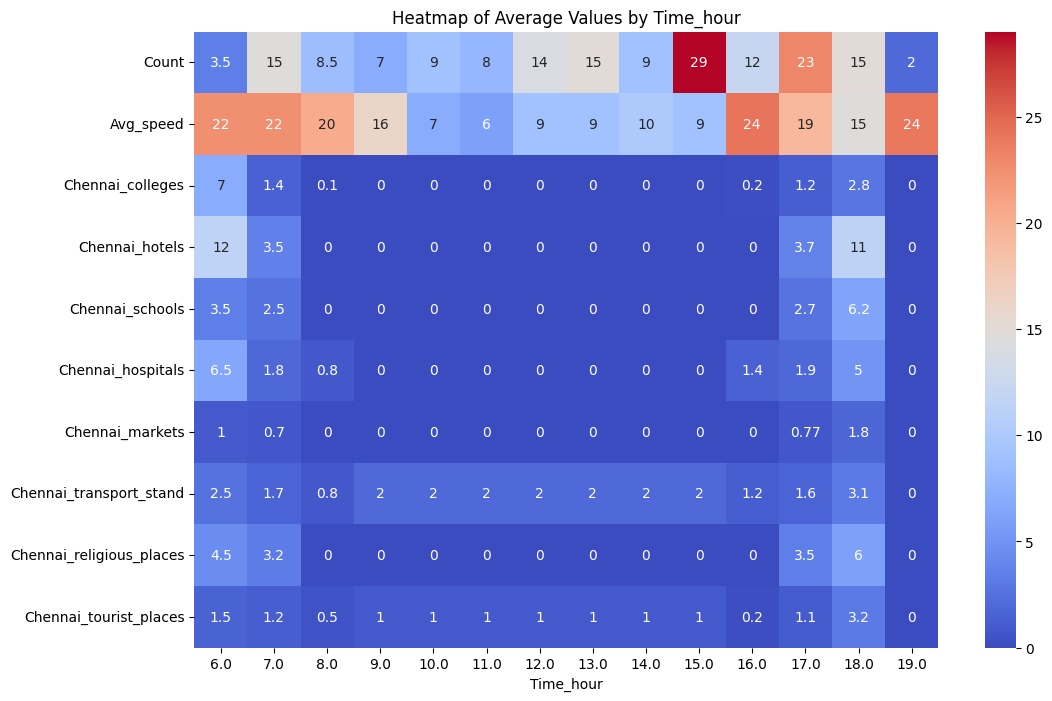

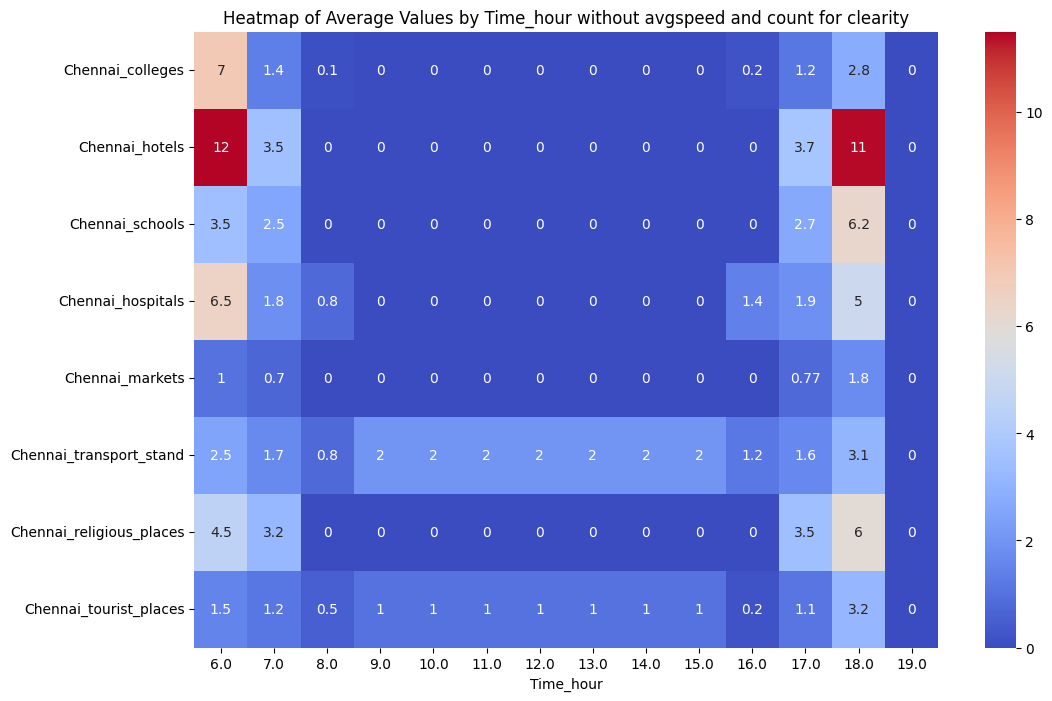

In [109]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Time basis\alert concenteration hourly with places count\cas_pcw.csv")
# Drop the "Lat" and "Long" columns
df = df.drop(["Lat", "Long"], axis=1)

# Group the data by 'Time_hour' and calculate the mean for each group
grouped_df = df.groupby('Time_hour').mean()
# Transpose the DataFrame to have 'Time_hour' on the y-axis
grouped_df = grouped_df.T


# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by Time_hour")

# Show the plot
plt.show()


grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by Time_hour without avgspeed and count for clearity")

# Show the plot
plt.show()


## Now we will see contribution of places in each hours in warning.

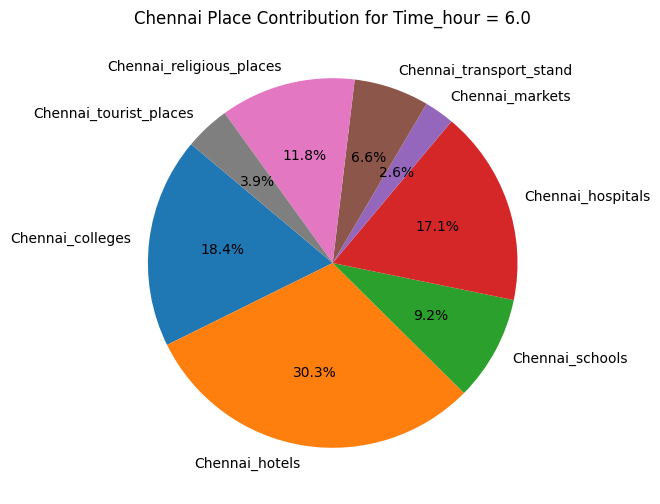

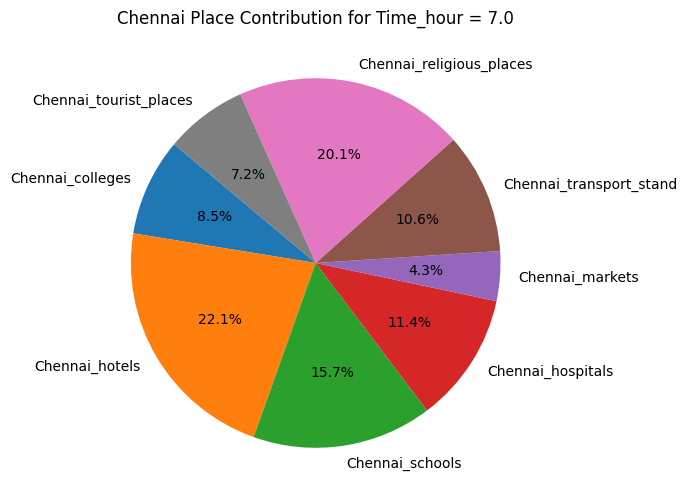

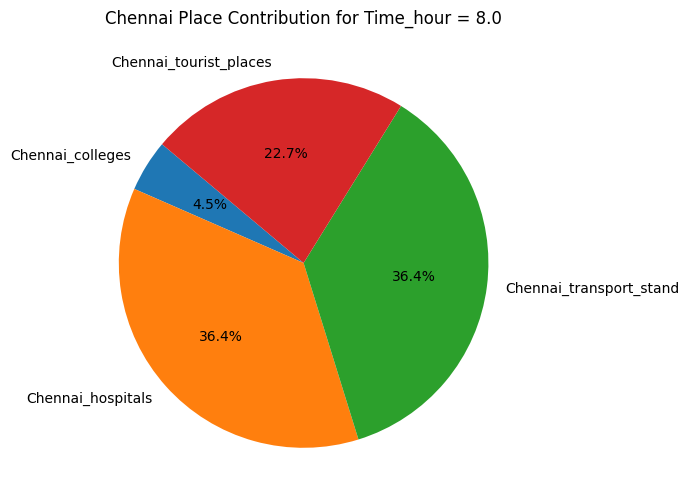

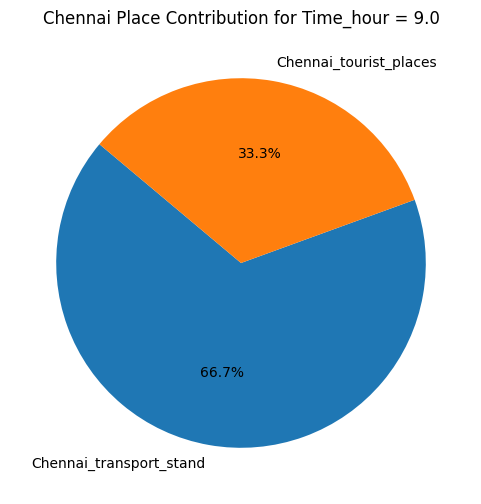

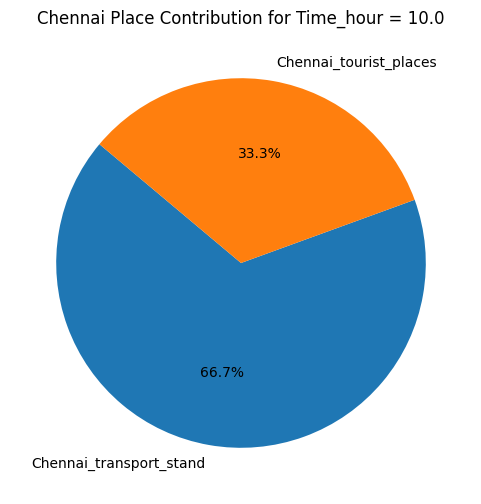

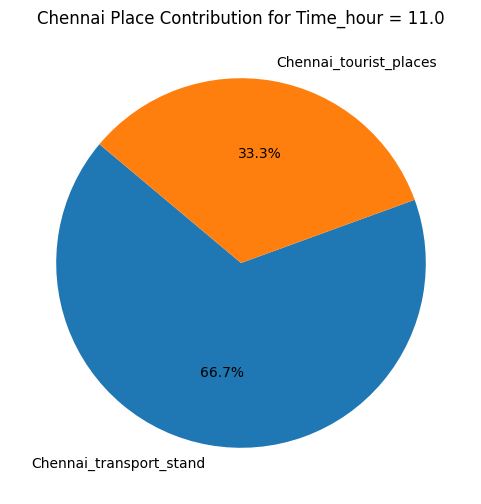

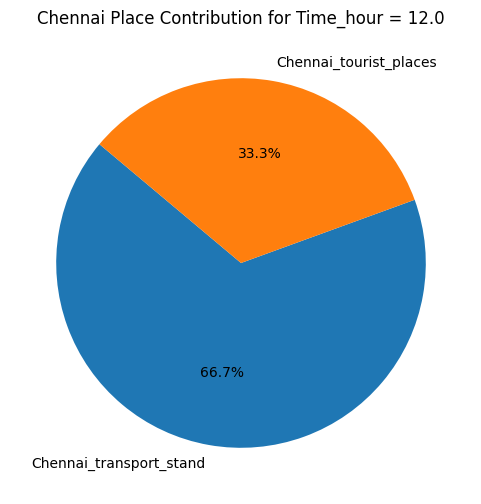

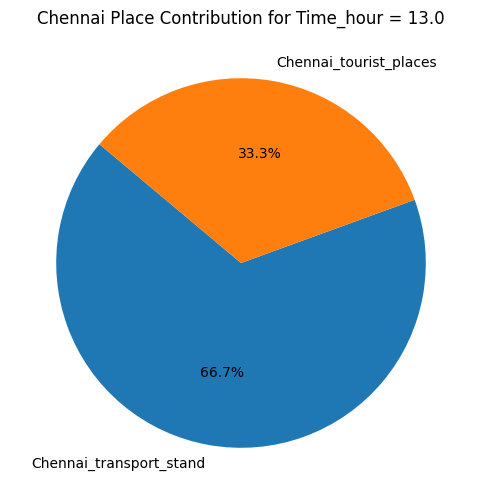

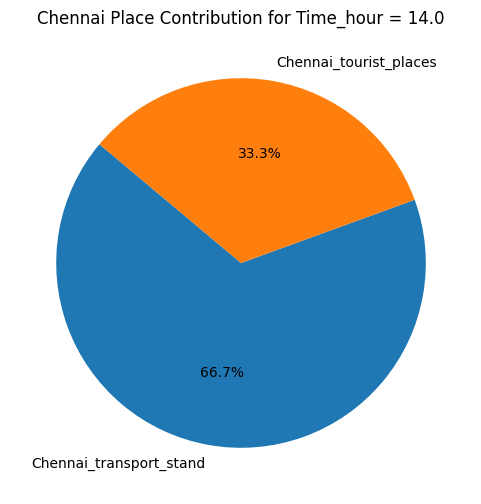

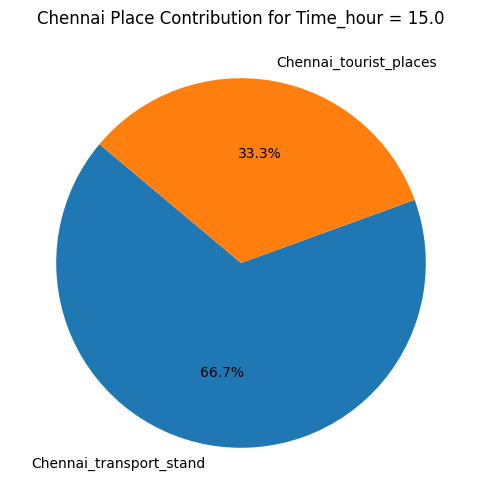

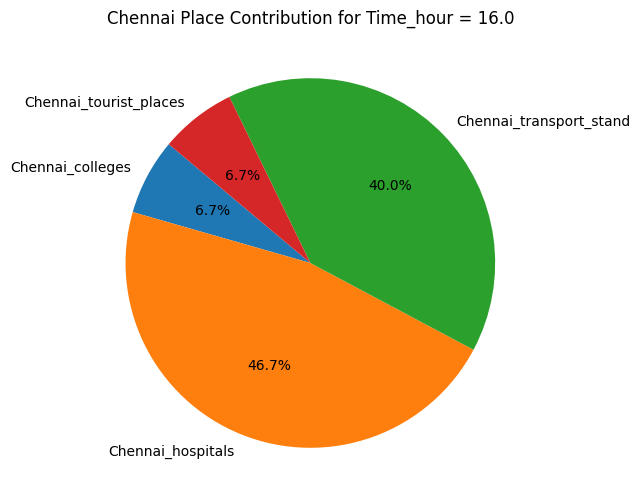

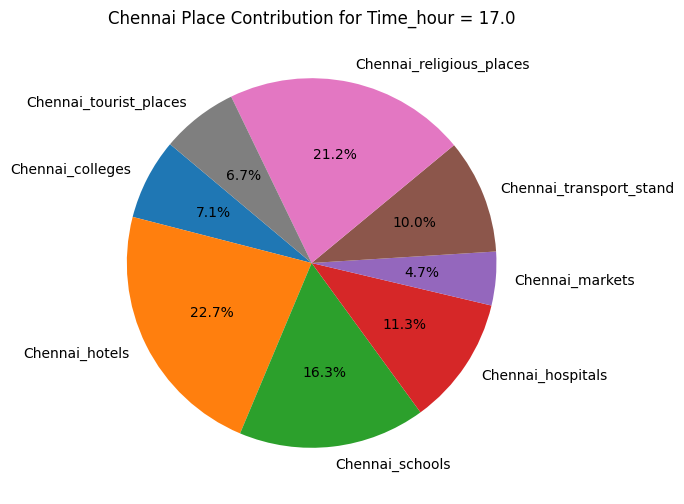

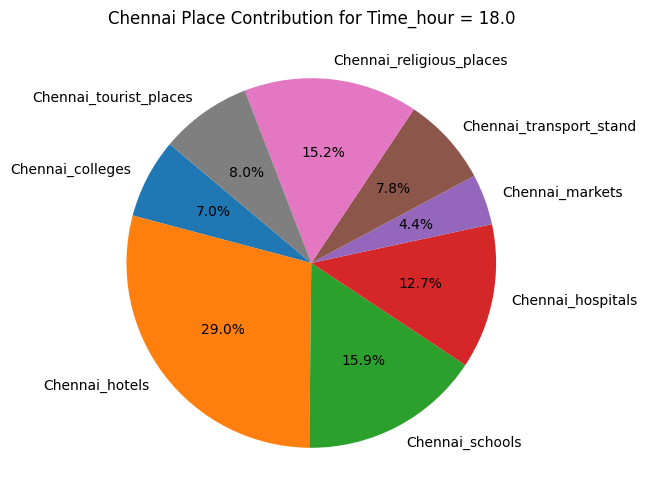

In [108]:


# Load your DataFrame from the CSV file
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Time basis\alert concenteration hourly with places count\cas_pcw.csv")

# Drop the "Lat" and "Long" columns, as well as columns 'Count' and 'Avg_speed'
df = df.drop(["Lat", "Long", "Count", "Avg_speed"], axis=1)

# Group the data by 'Time_hour' and calculate the sum for each group
grouped_df = df.groupby('Time_hour').sum()

# Calculate the total for each 'Time_hour' group
grouped_df['Total'] = grouped_df.sum(axis=1)

# Iterate through 'Time_hour' values and create pie charts only if any percentage is greater than 0
for time_hour, row in grouped_df.iterrows():
    chennai_places = row[:-1]  # Exclude the last column, which is the 'Total'
    total = row['Total']
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for Time_hour = {time_hour}")
        plt.show()


# Weekday seperated data of warnings for pcw

In [26]:
df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with weekday\cas_pcw.csv")
df=df[df["Weekday"]=="Sunday"]
print(df)

        Alert        Date      Time        Lat       Long  Vehicle  Speed  \
1477  cas_pcw  2022-08-14  07:35:06  13.074083  80.261996     5339     31   
1478  cas_pcw  2022-08-14  07:46:30  13.094796  80.292350     5339     18   
1479  cas_pcw  2022-08-14  07:49:26  13.087822  80.290045     5339     23   
1480  cas_pcw  2022-08-14  11:44:40  13.031620  80.277607     5339     28   
1481  cas_pcw  2022-08-14  12:42:32  12.907384  80.097322     5339     13   
1482  cas_pcw  2022-08-14  12:42:38  12.907384  80.097322     5339     13   

     Weekday  
1477  Sunday  
1478  Sunday  
1479  Sunday  
1480  Sunday  
1481  Sunday  
1482  Sunday  


## see percent contribution of places on sunday.

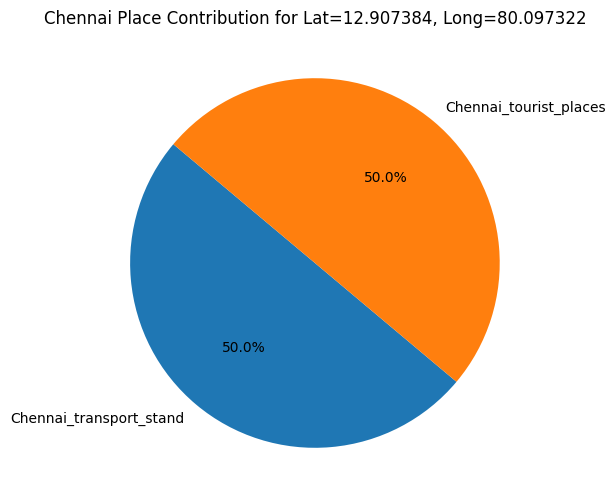

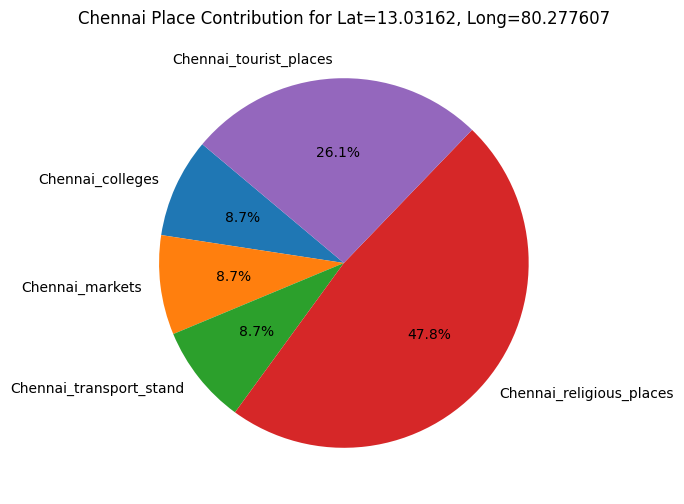

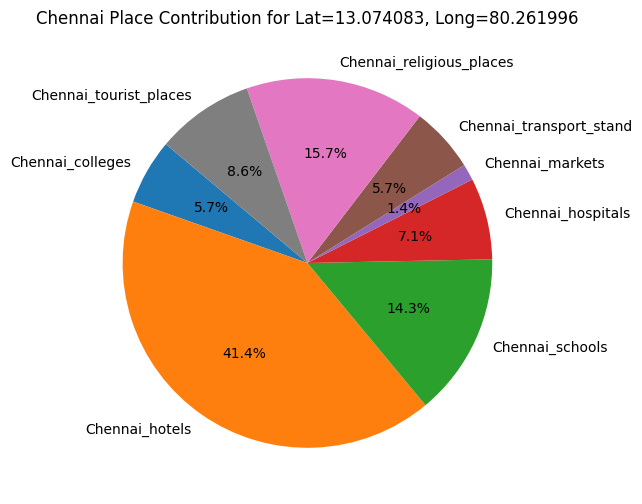

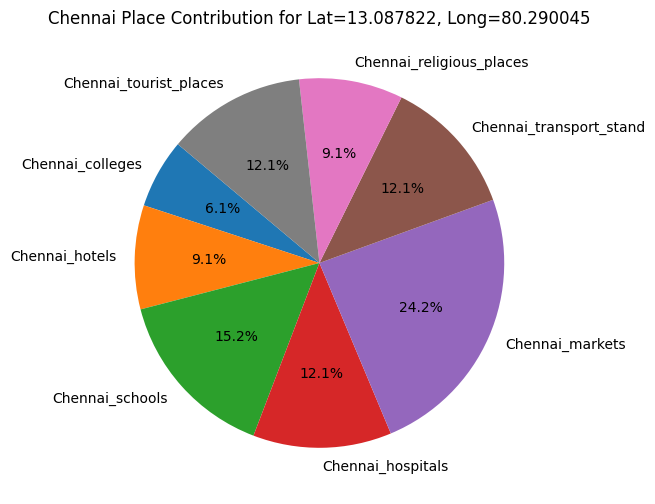

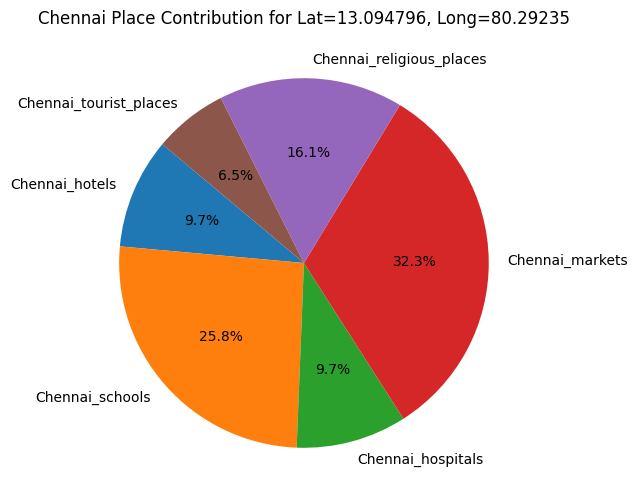

In [117]:
# Load your DataFrame from the CSV file
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\sunday seperated\sundayas_pcw.csv")

# Drop columns you don't need for this analysis
df = df.drop(["Alert", "Date", "Time", "Vehicle", "Speed", "Weekday"], axis=1)

# Group the data by latitude and longitude and calculate the sum for each group
grouped_df = df.groupby(["Lat", "Long"]).sum()

# Calculate the total for each combination
grouped_df["Total"] = grouped_df.sum(axis=1)

# Iterate through combinations and create pie charts only if there are nonzero percentages
for index, row in grouped_df.iterrows():
    chennai_places = row[:-1]  # Exclude the last column, which is the 'Total'
    total = row["Total"]
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for Lat={index[0]}, Long={index[1]}")
        plt.show()


##  Compare data weekday using heatmap.

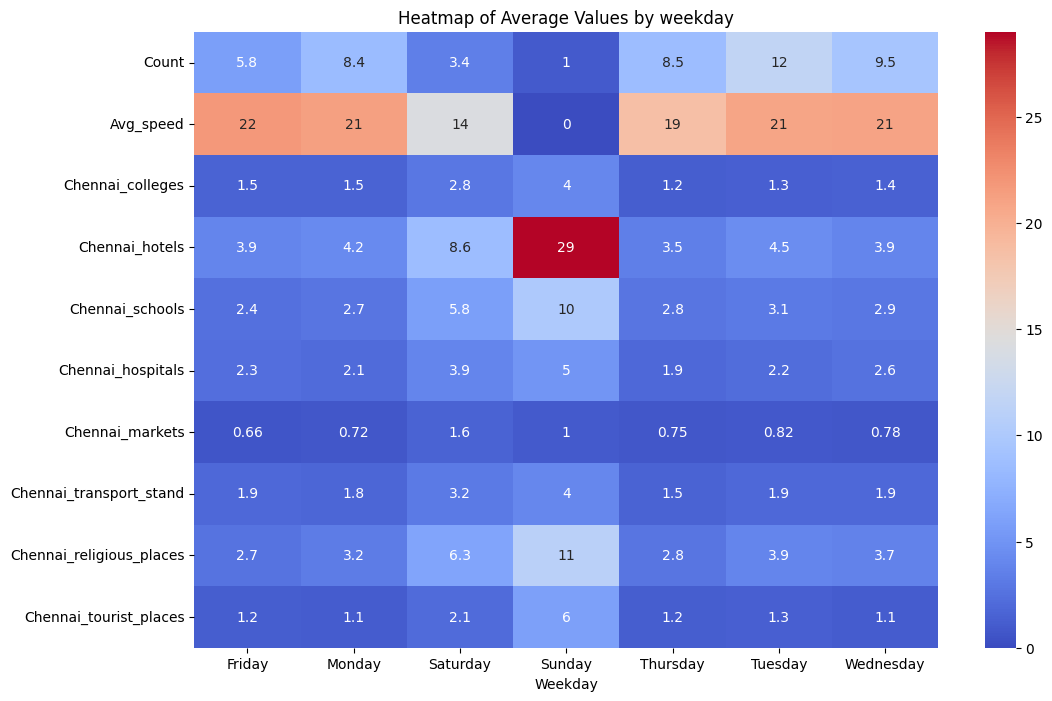

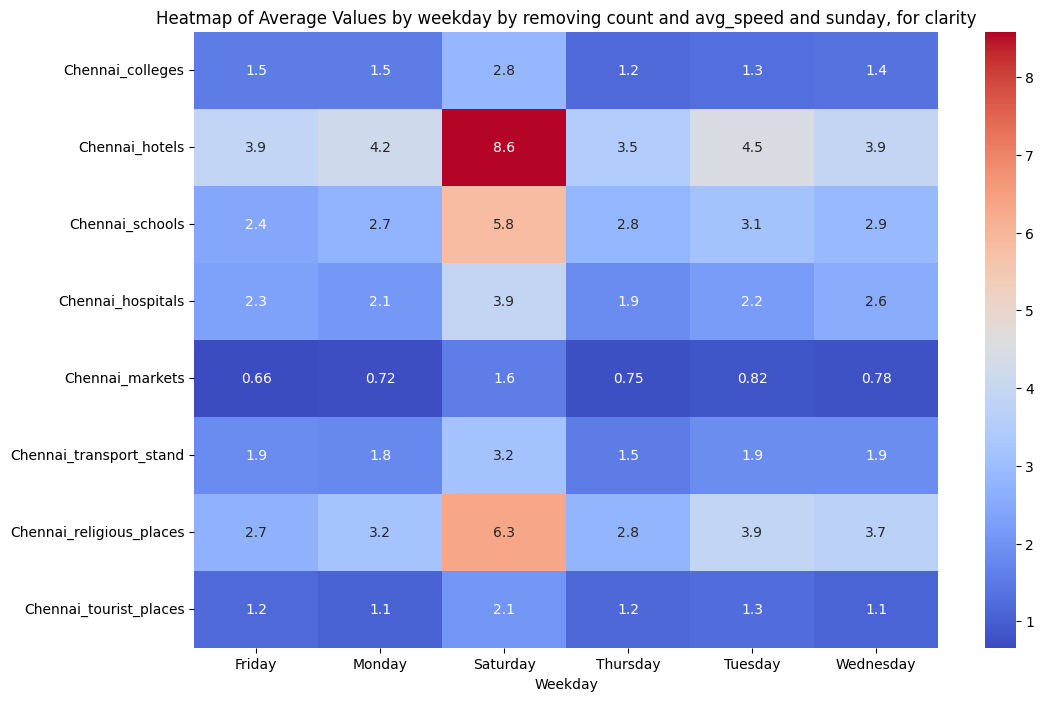

In [112]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with concenteration of warning each weekday with chennai places\cas_pcw.csv")
# Drop the "Lat" and "Long" columns
df = df.drop(["Lat", "Long"], axis=1)

# Group the data by 'Time_hour' and calculate the mean for each group
grouped_df = df.groupby('Weekday').mean()
# Transpose the DataFrame to have 'Time_hour' on the y-axis
grouped_df = grouped_df.T


# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by weekday")

# Show the plot
plt.show()

grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)
grouped_df = grouped_df.drop(["Sunday"], axis=1)
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by weekday by removing count and avg_speed and sunday, for clarity")

# Show the plot
plt.show()

## See contribution of places in each weekday. 

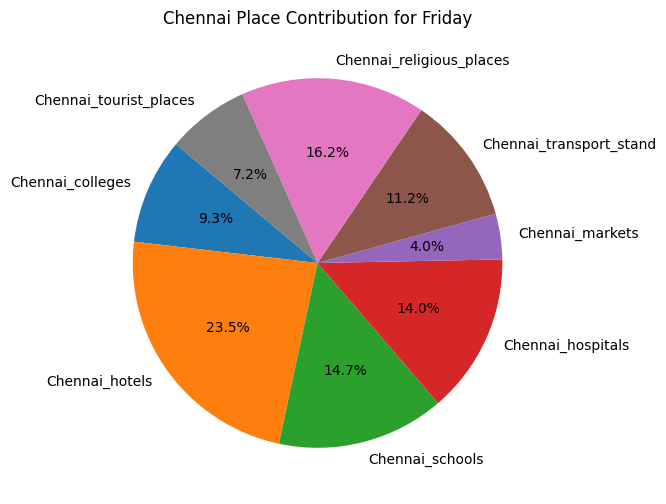

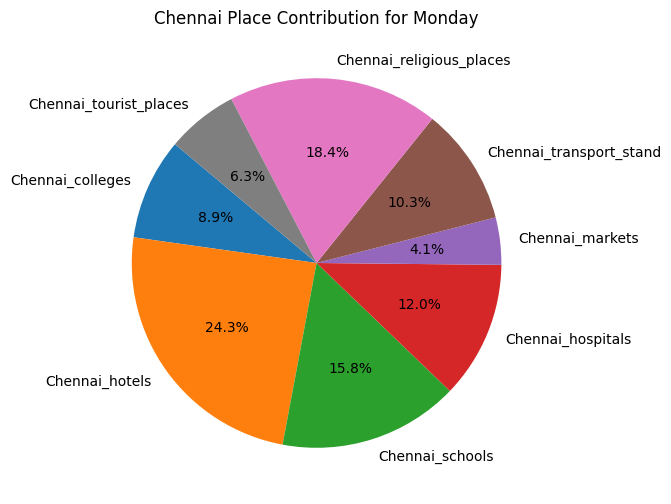

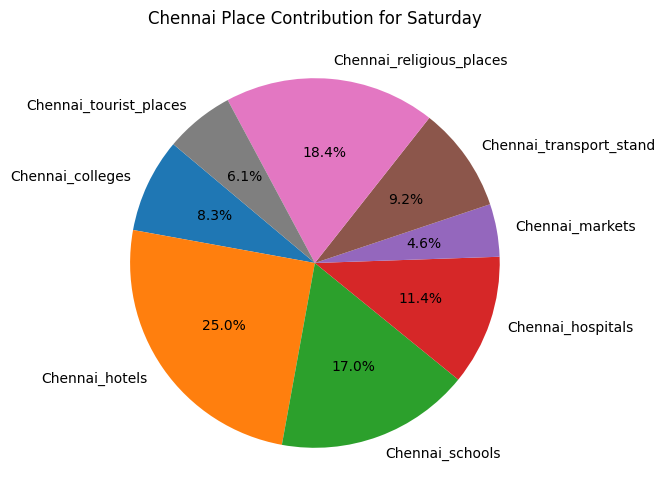

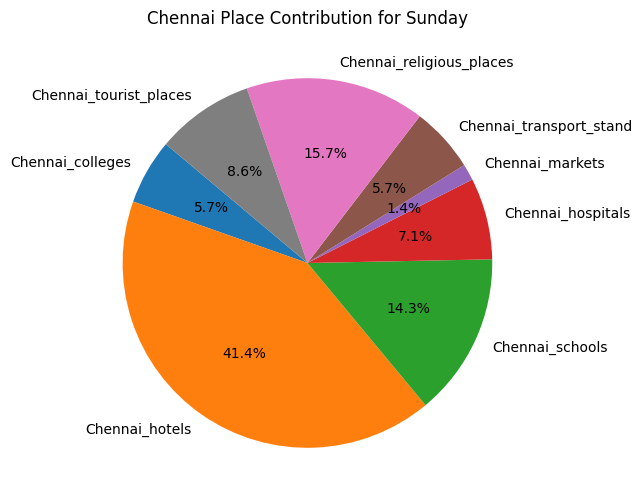

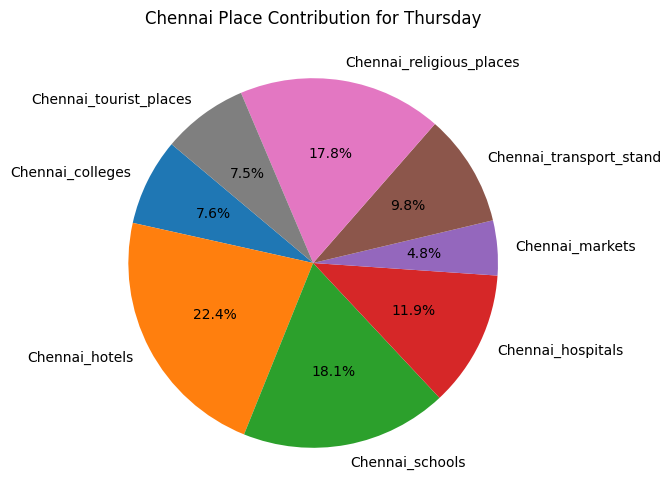

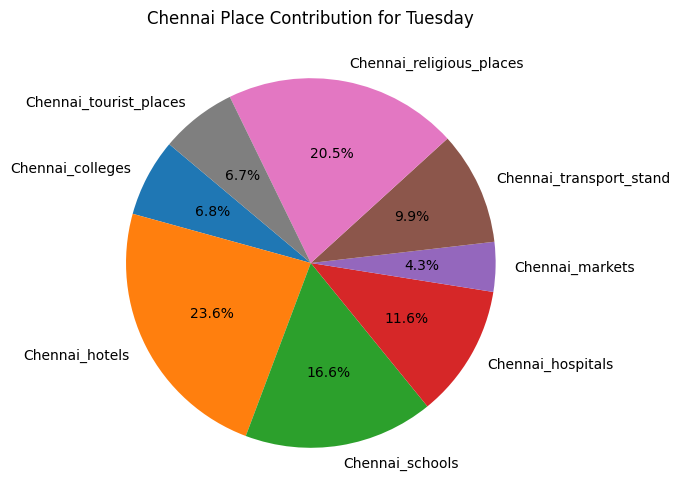

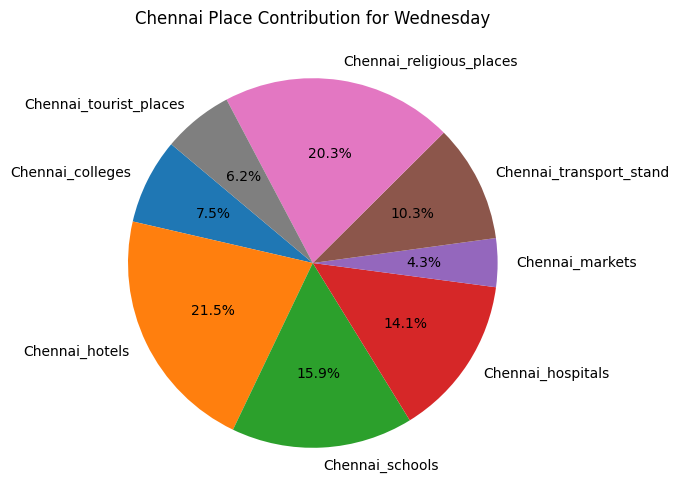

In [114]:


# Load your DataFrame from the CSV file
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with concenteration of warning each weekday with chennai places\cas_pcw.csv")

# Drop the "Lat" and "Long" columns, as well as columns 'Count' and 'Avg_speed'
df = df.drop(["Lat", "Long", "Count", "Avg_speed"], axis=1)

# Group the data by 'Time_hour' and calculate the sum for each group
grouped_df = df.groupby('Weekday').sum()

# Calculate the total for each 'Time_hour' group
grouped_df['Total'] = grouped_df.sum(axis=1)

# Iterate through 'Time_hour' values and create pie charts only if any percentage is greater than 0
for time_hour, row in grouped_df.iterrows():
    chennai_places = row[:-1]  # Exclude the last column, which is the 'Total'
    total = row['Total']
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for {time_hour}")
        plt.show()


# Analyse speed data for this warning.

q1 =  9.0
mean_speed =  17.0
q3 =  25.0
No of alerts below q1 =  548
No of alerts >= q1 but < mean_speed  =  477
No of alerts >= mean_speed but < q3  =  502
No of alerts greater than q3 =  449
No of alerts above mean =  951
No of alerts below mean =  1025


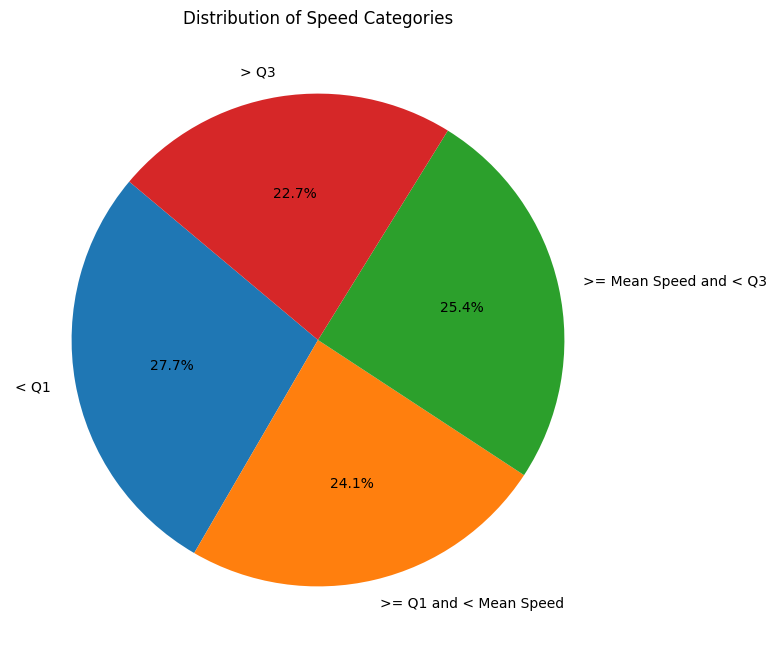

In [115]:
df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Data seperated on alert\cas_pcw.csv")

mean_speed=np.median(df["Speed"])
q1=np.percentile(df["Speed"],25)
q3=np.percentile(df["Speed"],75)
print("q1 = ",q1)
print("mean_speed = ",mean_speed)
print("q3 = ",q3)
d1=df[df["Speed"]<=q1].shape
print("No of alerts below q1 = " ,d1[0])
d2=df[(df["Speed"]>q1) & (df["Speed"]<=mean_speed)].shape
print("No of alerts >= q1 but < mean_speed  = " ,d2[0])
d3=df[(df["Speed"]>mean_speed) & (df["Speed"]<=q3)].shape
print("No of alerts >= mean_speed but < q3  = " ,d3[0])
d4=df[df["Speed"]>q3].shape
print("No of alerts greater than q3 = " ,d4[0])
print("No of alerts above mean = ",(d3[0]+d4[0]))
print("No of alerts below mean = ",(d1[0]+d2[0]))


# Create a list of labels for the categories
categories = ["< Q1", ">= Q1 and < Mean Speed", ">= Mean Speed and < Q3", "> Q3"]

# Create a list of data points in each category
data = [d1[0], d2[0], d3[0], d4[0]]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Speed Categories")
plt.show()


## seperate data and see where speed is more and less.

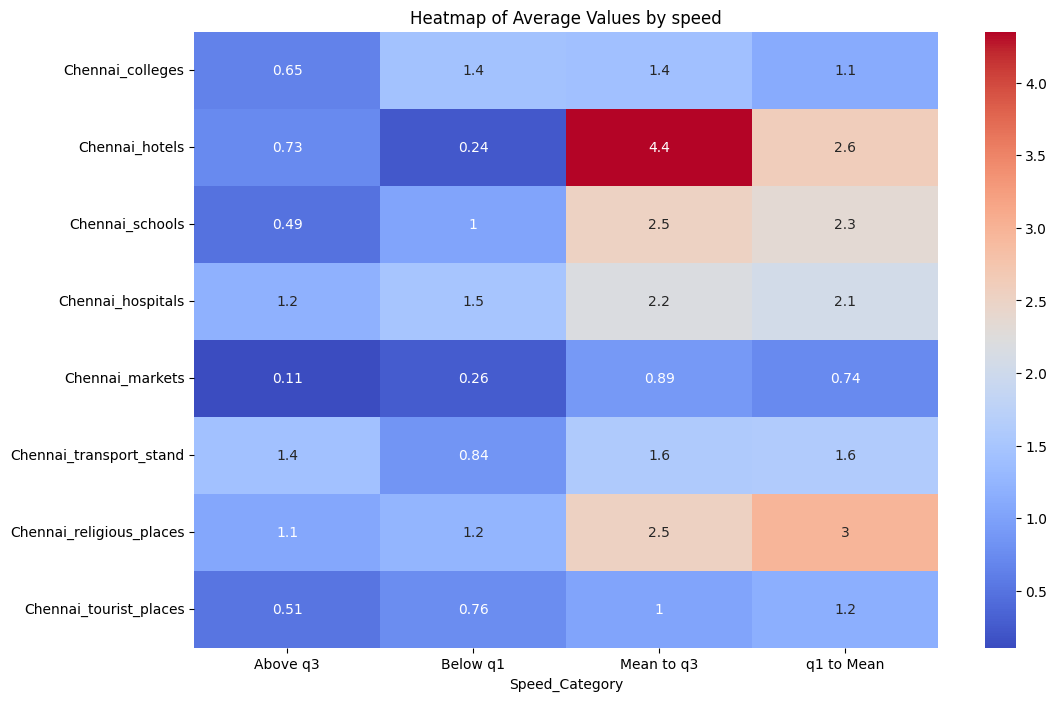

In [116]:
df1 = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\alert density basis\alert high density points with places count\cas_pcw.csv")

# Drop the "Lat" and "Long" columns, as well as columns 'Count'
df1 = df1.drop(["Lat", "Long", "Count"], axis=1)

# Calculate percentiles for df1 (assuming you want to perform calculations on df1)
mean_speed = np.median(df1["Avg_speed"])
q1 = np.percentile(df1["Avg_speed"], 25)
q3 = np.percentile(df1["Avg_speed"], 75)

# Create groups based on conditions for df1
def speed_category(speed):
    if speed < q1:
        return "Below q1"
    elif speed >= q1 and speed <= mean_speed:
        return "q1 to Mean"
    elif speed >= mean_speed and speed <= q3:
        return "Mean to q3"
    else:
        return "Above q3"

df1['Speed_Category'] = df1['Avg_speed'].apply(speed_category)
# Group the data by 'Time_hour' and calculate the mean for each group
grouped_df = df1.groupby('Speed_Category').mean()
grouped_df=grouped_df.drop(["Avg_speed"],axis=1)
# Transpose the DataFrame to have 'Time_hour' on the y-axis
grouped_df = grouped_df.T


# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by speed")

# Show the plot
plt.show()

In [ ]:
avg speed waha chal raha jaha school hotel college etc hai. And extra bhi likh sakte hai hm.